In [32]:
# 17/12/2024

In [33]:
import cv2 as cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Este bloque es solo para colab

In [34]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# ruta para colab
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/imagenes"
os.chdir(path)

# ruta en local
# os.chdir("../datos/imagenes")


*   Detección de bordes


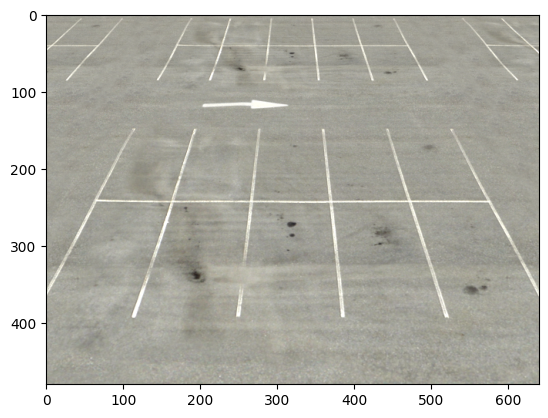

In [36]:
img = cv2.imread('parking.png')
img = img[:,:,::-1]

# cambiar a RGB
plt.imshow(img)
plt.show()

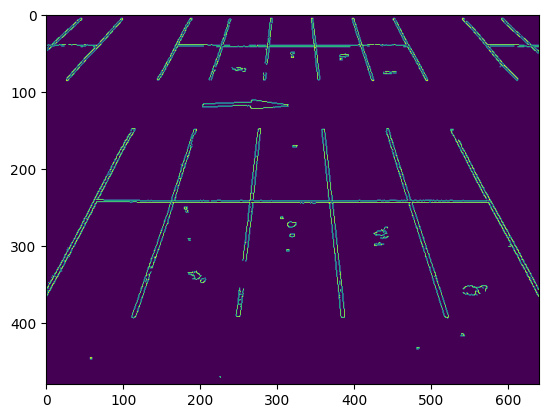

In [37]:
# Canny: busca los bordes de los objetos que hay en la imagen: edge detector
bordes = cv2.Canny(img, 100, 200)

plt.imshow(bordes)
plt.show()

In [38]:
bordes.shape

(480, 640)

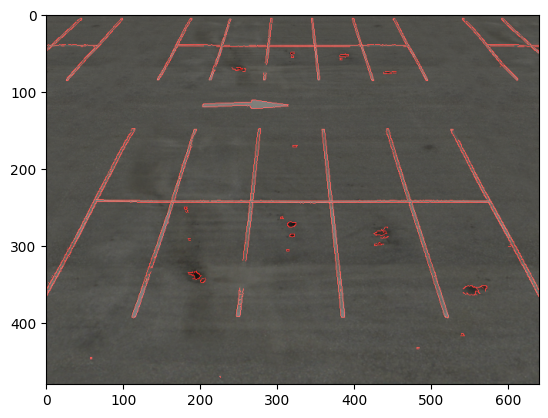

In [39]:
copia = img.copy()

# convertir a tres capas para poder mezclarla con la otra
bordesRGB = cv2.cvtColor(bordes, cv2.COLOR_GRAY2RGB)

# dejar solo el canal rojo
bordesRGB[:,:,1] = 0
bordesRGB[:,:,2] = 0

# superponer las imagenes
union = cv2.addWeighted(img, 0.5, bordesRGB, 1, 0)

plt.imshow(union)
plt.show()

Ver https://docs.opencv.org/3.4/db/d73/classcv_1_1LineSegmentDetector.html


*  Difuminar


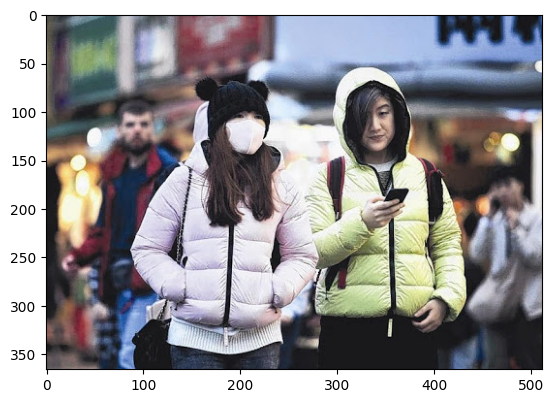

In [40]:
img = cv2.imread(path + '/maksssksksss0.png')
img = img[:,:,::-1]

plt.imshow(img)
plt.show()

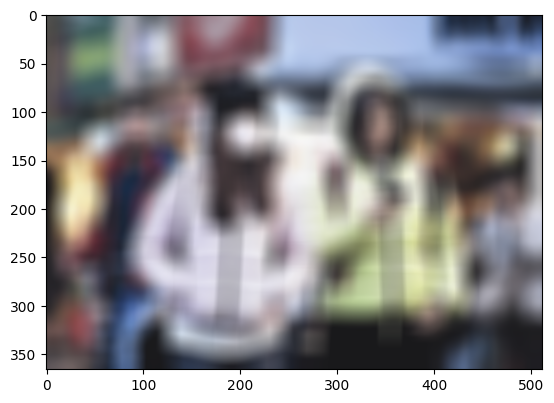

In [41]:
difuminada = cv2.blur(img,(25,25))

plt.imshow(difuminada)
plt.show()

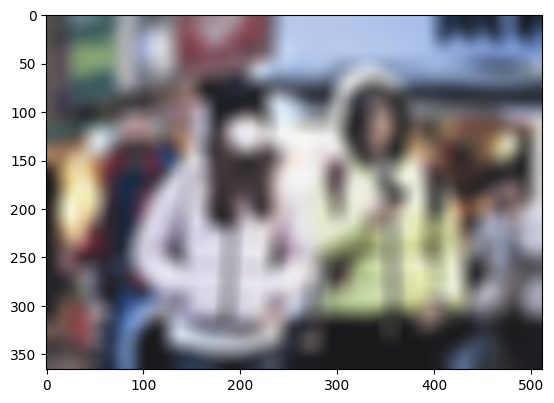

In [42]:
difuminada = cv2.GaussianBlur(img,(25,25), 10)

plt.imshow(difuminada)
plt.show()

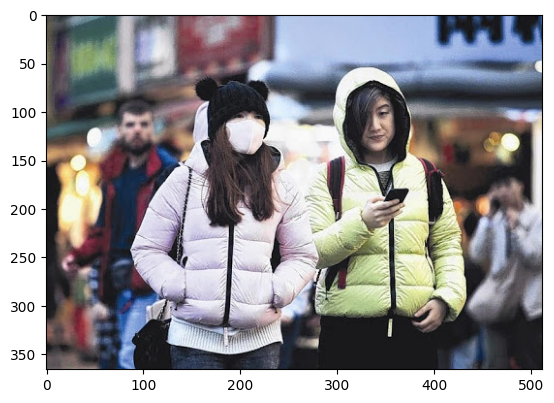

In [43]:
difuminada = cv2.bilateralFilter(img,50, 0, 40)

plt.imshow(difuminada)
plt.show()

Poner un rectángulo

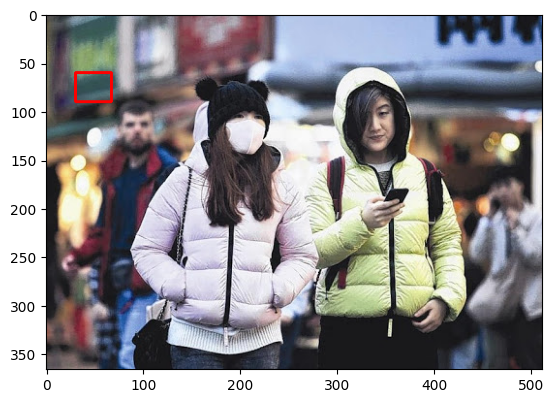

In [44]:
cv2.rectangle(difuminada,(30,60),(67,90),(255,0,0),2)

plt.imshow(difuminada)
plt.show()

Buscar caras. Utiliza la imagen sin difuminar.

In [45]:
# cargar el detector (haarcascade_frontalface_default.xml)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
gris = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# busca las caras y devuelve un array
faces = face_cascade.detectMultiScale(gris, 1.2, 2)

faces

array([[308,  81,  60,  60],
       [149,  15, 178, 178]], dtype=int32)

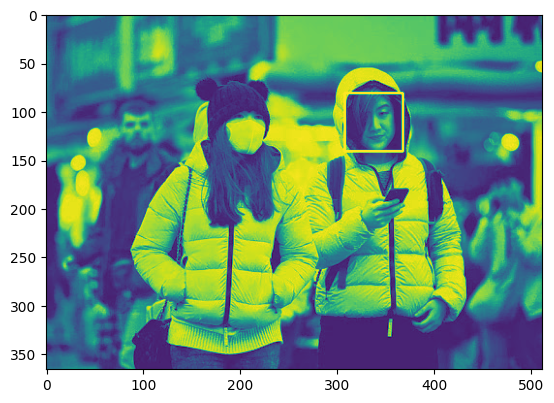

In [46]:
cv2.rectangle(gris,(308,81),(308+60, 81+60),(255,0,0),2)

plt.imshow(gris)
plt.show()